In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
os.getcwd()

'C:\\Users\\ADMIN'

### DATA IMPORT

In [ ]:
bigmart=pd.read_csv(r"C:\Users\ADMIN\train_bigmart.csv")
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## DATA DESCRIPTION

Data source:Kaggel


Overview: This Data consist of differet Item(product) sale in various outlet of bigmart superstore. its a merge data set contain outlet describe and product describe columns.columns information is given below,
product number and outlet number combine gives us primary key for this dataset.


- Item_Identifier: Unique identifier for Item sold
- Item_Weight: Weight of Item sold
- Item_Fat_Content: Fat contain information of item sold
- Item_Visibility: The percentage of total display area that the product occupies in the store
- Item_Type: Type of item
- Item_MRP: Price of Item
- Outlet_Identifier: Unique identifier for outlet in which underlying item sold
- Outlet_Establishment_Year: Establishment yar of outlier
- Outlet_Size: size of outlet
- Outlet_Location_Type: The location type of the store.
- Outlet_Type: The Type of outlet
- Item_Outlet_Sales: Total sale for underlying item in underlying outlet



In [ ]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## MISSING VALUE TREATMENT

In [ ]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see above columns, there are null values present in item_Weight and Outlet_size, we have to either drop them or impute them before proceed further                 

In [ ]:
Outlet_size_null=list(bigmart[bigmart["Outlet_Size"].isnull()]["Outlet_Identifier"].unique())
print("Outlet number for which outlet size is not defined are ",Outlet_size_null)

Outlet number for which outlet size is not defined are  ['OUT010', 'OUT045', 'OUT017']


In [ ]:
bigmart[["Outlet_Identifier","Outlet_Type","Outlet_Location_Type","Outlet_Size"]].drop_duplicates()

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Size
0,OUT049,Supermarket Type1,Tier 1,Medium
1,OUT018,Supermarket Type2,Tier 3,Medium
3,OUT010,Grocery Store,Tier 3,NaN
4,OUT013,Supermarket Type1,Tier 3,High
7,OUT027,Supermarket Type3,Tier 3,Medium
8,OUT045,Supermarket Type1,Tier 2,NaN
9,OUT017,Supermarket Type1,Tier 2,NaN
11,OUT046,Supermarket Type1,Tier 1,Small
19,OUT035,Supermarket Type1,Tier 2,Small
23,OUT019,Grocery Store,Tier 1,Small


we can refer this table to impute outlet size, since Grocery Stores are of small size, we can imput size small for OUT010 outlet and same for remaining two outlet as supermarket_type_1 of Tier 2 location are of small size.its a assumption and need to crosscheck always as and when we get more data

In [ ]:
bigmart["Outlet_Size"]=np.where(bigmart["Outlet_Identifier"].isin(["OUT010","OUT045","OUT017"]),"Small",bigmart["Outlet_Size"])

In [ ]:
bigmart[["Item_Identifier","Item_Weight"]].drop_duplicates().sort_values(by='Item_Identifier')

,Item_Identifier,Item_Weight
118,DRA12,11.60
2879,DRA24,NaN
1148,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
1267,NCZ53,9.60
1896,NCZ54,NaN


We have gained item weight from other transactions occured,we can use weight from previous transaction of same item to impute missing weights, ffill method is useful for this type of imputation, it simply impute value of previous row in next null value

In [ ]:
bigmart["Item_Weight"]=bigmart.sort_values(by='Item_Identifier')["Item_Weight"].fillna(method="ffill")

In [ ]:
bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Missing value treatment is done

## OUTLIERS TREATMENT

An outlier is a data point that differs significantly from other observations

Boxplot is typically used to detect outliers in numeric column of dataset. observation above upper whisker or below lower whisker of boxplot is considered as outlier

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


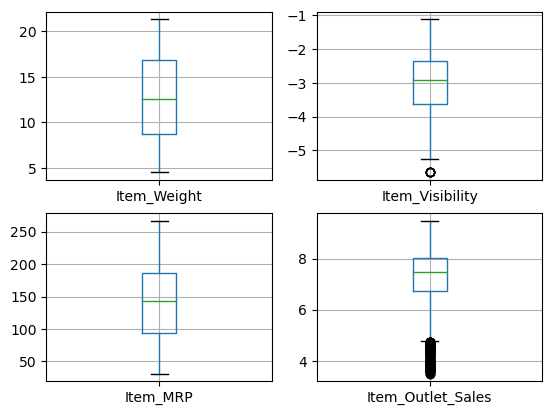

In [ ]:
bigmart['Item_Visibility']=np.log(bigmart['Item_Visibility'])
bigmart['Item_Outlet_Sales']=np.log(bigmart['Item_Outlet_Sales'])


plt.subplot(221)
boxplot = bigmart.boxplot(column=['Item_Weight'])

plt.subplot(222)
boxplot = bigmart.boxplot(column=['Item_Visibility'])

plt.subplot(223)
boxplot = bigmart.boxplot(column=['Item_MRP'])

plt.subplot(224)
boxplot = bigmart.boxplot(column=['Item_Outlet_Sales'])

Its clealy visible from above boxplots that there are outliers present in Item_Visibility and item_Outlet_Sales,To treat these outliers we will simply replace of these extreme value with upper whisker of boxplot since all outliers are greater than upper limit

In [ ]:
IQR_Outlet_Sales=bigmart["Item_Outlet_Sales"].quantile(0.75)-bigmart["Item_Outlet_Sales"].quantile(0.25)
IQR_Visibility=bigmart["Item_Visibility"].quantile(0.75)-bigmart["Item_Visibility"].quantile(0.25)

Upper_limit_Outlet_Sales = bigmart["Item_Outlet_Sales"].quantile(0.75) + (IQR_Outlet_Sales * 1.5)
Upper_limit_Visibility = bigmart["Item_Visibility"].quantile(0.75) + (IQR_Visibility * 1.5)

Lower_limit_Visibility = bigmart["Item_Visibility"].quantile(0.25) - (IQR_Visibility * 1.5)
Lower_limit_Outlet_Sales = bigmart["Item_Outlet_Sales"].quantile(0.75) - (IQR_Outlet_Sales * 1.5)


# print("Upper limit for item_Outlet_Sales: ",Upper_limit_Outlet_Sales,end="\n")
# print("Upper limit for Item_Visibility: ",Upper_limit_Visibility,end="\n")

In [ ]:
bigmart["Item_Outlet_Sales"]=np.where(bigmart["Item_Outlet_Sales"]<Lower_limit_Outlet_Sales,Lower_limit_Outlet_Sales,bigmart["Item_Outlet_Sales"])
bigmart["Item_Visibility"]=np.where(bigmart["Item_Visibility"]<Lower_limit_Visibility,Lower_limit_Visibility,bigmart["Item_Visibility"])
# bigmart["Item_Visibility"]=np.where(bigmart["Item_Visibility"]>Upper_limit_Visibility,Upper_limit_Visibility,bigmart["Item_Visibility"])


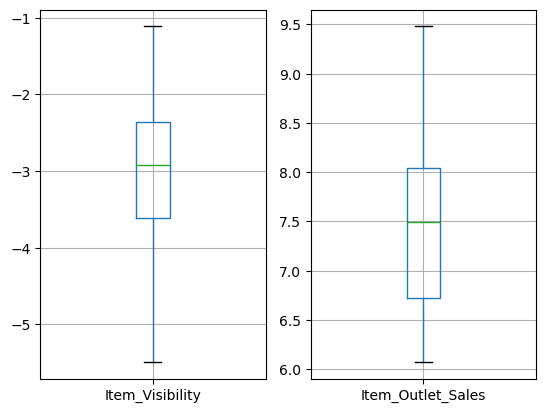

In [ ]:
plt.subplot(121)
boxplot = bigmart.boxplot(column=['Item_Visibility'])

plt.subplot(122)
boxplot = bigmart.boxplot(column=['Item_Outlet_Sales'])

Outliers from these two columns has been replaced by upper limit hence boxplot is not showing any outliers. outliers tretment is done

### Extra Data corrections

In [ ]:
bigmart["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

we have to replace LF and low fat with Low Fat, reg with Regular to make categories consistent

In [ ]:
bigmart["Item_Fat_Content"]=np.where(bigmart["Item_Fat_Content"].isin(["LF","low fat"]),"Low Fat",
                                    np.where(bigmart["Item_Fat_Content"].isin(["reg"]),"Regular",bigmart["Item_Fat_Content"]))

In [ ]:
bigmart["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Multipl Linear Regression

### LABEL ENCODING

read and write about this technique

In [ ]:
bigmart["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

We will club Itemtype having low freqencies in others categories to reduce complexity after encoding

In [ ]:
Item_type_freq = (bigmart['Item_Type'].value_counts())/bigmart.shape[0]
bottom_decile = Item_type_freq.quantile(q=0.20)
less_freq_type=Item_type_freq[Item_type_freq<=bottom_decile]
less_freq_type

Others           0.019829
Starchy Foods    0.017365
Breakfast        0.012906
Seafood          0.007509
Name: Item_Type, dtype: float64

In [ ]:
bigmart["Item_Type"]=np.where(bigmart["Item_Type"].isin(less_freq_type.index.tolist()),"Others",bigmart["Item_Type"])

In [ ]:
#concating Item_identifier and Outlet_identifier in one columns,just to create primary key and reduce number of columns
bigmart["Item_Outlet_No"]=bigmart["Item_Identifier"]+"_"+bigmart["Outlet_Identifier"]
final_data_model=bigmart.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

In [ ]:
# one_hot_encoded_training_predictors = pd.get_dummies(final_data_model)
final_data_model['Item_Type'] = pd.factorize(final_data_model['Item_Type'])[0]
final_data_model['Outlet_Size'] = pd.factorize(final_data_model['Outlet_Size'])[0]
final_data_model['Outlet_Location_Type'] = pd.factorize(final_data_model['Outlet_Location_Type'])[0]
final_data_model['Outlet_Type'] = pd.factorize(final_data_model['Outlet_Type'])[0]
final_data_model['Item_Fat_Content'] = pd.factorize(final_data_model['Item_Fat_Content'])[0]
final_data_model['Outlet_Establishment_Year'] = pd.factorize(final_data_model['Outlet_Establishment_Year'])[0]

#### DATA SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
cols_to_scale = ['Item_Weight','Item_MRP']
df_scaled = pd.DataFrame(scaler.fit_transform(final_data_model[cols_to_scale]), columns=cols_to_scale)
final_data_model[cols_to_scale] = df_scaled


In [ ]:
final_data_model=final_data_model.set_index('Item_Outlet_No')

In [ ]:
final_data_model

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Outlet_No,,,,,,,,,,
FDA15_OUT049,0.282525,0,-4.132215,0,0.927507,0,0,0,0,8.225540
DRC01_OUT018,0.081274,1,-3.948780,1,0.072068,1,0,1,1,6.094524
FDN15_OUT049,0.770765,0,-4.088756,2,0.468288,0,0,0,0,7.648392
FDX07_OUT010,0.871986,1,-5.493391,3,0.640093,2,1,1,2,6.596300
NCD19_OUT013,0.260494,0,-5.493391,4,0.095805,3,2,1,0,6.902446
...,...,...,...,...,...,...,...,...,...,...
FDF22_OUT013,0.137541,0,-2.868511,6,0.777729,3,2,1,0,7.929625
FDS36_OUT045,0.227746,1,-3.057982,5,0.326263,5,1,2,0,6.308617
NCJ29_OUT035,0.359929,0,-3.347099,9,0.228492,8,1,2,0,7.084322


### Train Test Split

In [ ]:
indep_var = final_data_model.drop(["Item_Outlet_Sales"],axis=1)
target_var = final_data_model.Item_Outlet_Sales

In [ ]:
from sklearn.model_selection import train_test_split
indep_var_train, indep_var_test, target_var_train, target_var_test = train_test_split(indep_var, target_var,random_state = 99,test_size=0.25)

In [ ]:
indep_var_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Outlet_No,,,,,,,,,
FDV40_OUT013,0.761834,0,-4.221299,7,0.179601,3,2,1,0
FDH47_OUT046,0.532599,1,-2.049369,8,0.276389,7,1,0,0
NCE42_OUT027,0.985115,0,-4.551539,4,0.864632,4,0,1,3
FDG45_OUT017,0.211075,0,-2.049803,3,0.774624,6,1,2,0
NCF42_OUT019,0.272403,0,-1.227357,4,0.618770,4,1,0,2
...,...,...,...,...,...,...,...,...,...
FDF26_OUT018,0.135159,1,-3.061344,11,0.525937,1,0,1,1
NCS42_OUT035,0.240845,0,-2.667820,4,0.254351,8,1,2,0
FDX37_OUT013,0.693361,0,-5.493391,11,0.294060,3,2,1,0


In [ ]:
# #Importing Libraries
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
#Fit the model
model = sm.OLS(target_var_train,indep_var_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          1.955e+04
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                        0.00
Time:                        01:03:48   Log-Likelihood:                         -11179.
No. Observations:                6392   AIC:                                  2.238e+04
Df Residuals:                    6383   BIC:                                  2.244e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Weight                   1.5738      0.059     26.671      0.000       1.458       1.690
Item_Fat_Content              0.5009      0.036     13.972      0.000       0.431       0.571
Item_Visibility              -0.8594      0.014    -61.866      0.000      -0.887      -0.832
Item_Type                     0.1308      0.005     25.938      0.000       0.121       0.141
Item_MRP                      3.2334      0.062     52.061      0.000       3.112       3.355
Outlet_Establishment_Year     0.1485      0.008     18.231      0.000       0.133       0.164
Outlet_Size                   0.2094      0.032      6.444      0.000       0.146       0.273
Outlet_Location_Type          0.3392      0.025     13.686      0.000       0.291       0.388
Outlet_Type                   0.3043      0.017     17.582      0.000       0.270       0.338
==============================================================================
Omnibus:                       29.100   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.399
Skew:                          -0.161   Prob(JB):                     4.13e-07
Kurtosis:                       3.083   Cond. No.                         30.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(target_var_test,model.predict(indep_var_test))
RMSE = np.sqrt(MSE)
MSE

1.8925858481286595

In [ ]:
# print("R squared: {}".format(r2_score(y_true=target_var_train,y_pred=target_pred)))

In [ ]:
# sum((model.predict(indep_var_test)-target_var_test)^2)

In [ ]:
model.predict(indep_var_test)

Item_Outlet_No
FDU49_OUT045     8.716871
FDJ20_OUT049     5.646951
FDF04_OUT035    10.985412
NCB19_OUT027     5.356037
FDW32_OUT035     7.047183
                  ...    
FDD39_OUT045     7.590205
FDR52_OUT017     8.367107
FDA43_OUT013     6.813822
NCO42_OUT017     8.637240
FDZ44_OUT035     6.763260
Length: 2131, dtype: float64

In [ ]:
target_var_test

Item_Outlet_No
FDU49_OUT045    7.679644
FDJ20_OUT049    7.121566
FDF04_OUT035    7.500150
NCB19_OUT027    7.631100
FDW32_OUT035    7.343418
                  ...   
FDD39_OUT045    8.210273
FDR52_OUT017    7.044476
FDA43_OUT013    7.065166
NCO42_OUT017    8.240402
FDZ44_OUT035    7.328667
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

### Multicollinearity

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = indep_var_train.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(indep_var_train.values, i) for i in range(indep_var_train.shape[1])]

#view VIF for each predictor variable
print(vif_df)

                    variable       VIF
0                Item_Weight  3.659405
1           Item_Fat_Content  1.500996
2            Item_Visibility  6.692674
3                  Item_Type  3.326956
4                   Item_MRP  3.646070
5  Outlet_Establishment_Year  5.065588
6                Outlet_Size  3.465072
7       Outlet_Location_Type  3.438792
8                Outlet_Type  1.577832


### Normality Test

In [ ]:
import pylab as py
data_points=target_var_test-model.predict(indep_var_test)

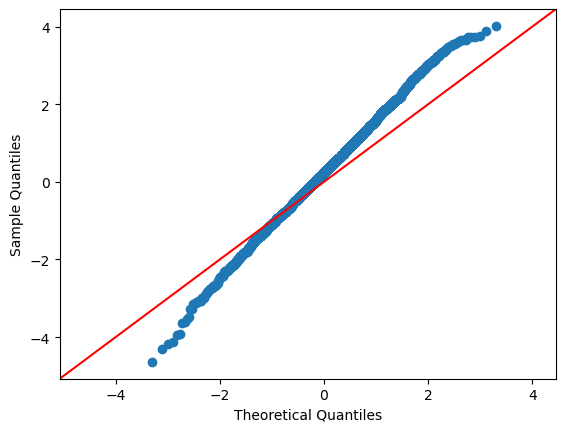

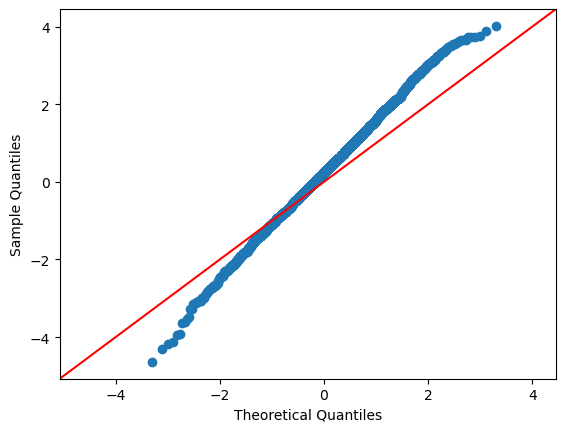

In [ ]:
sm.qqplot(data_points,line='45')

### shapiro wilk test

- Ho: Sample is from the normal distributions
- Ha: Sample is not from the normal distributions.

In [ ]:
from scipy.stats import shapiro
shapiro(data_points)

ShapiroResult(statistic=0.9988071918487549, pvalue=0.1511487364768982)

since p value is greater than 0.05 we fail to reject null hypothesis and conclude that error terms follow normal distribution which satisfy our regression assumption.